In [60]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#import the dataset 
df= pd.read_csv('twm_savings_acct.csv', delimiter=';')

In [30]:
#filter out all in the inactive account
df = df[df['account_active'] == 'Y ']

In [35]:
df = df[['starting_balance', 'ending_balance']]

In [38]:
ct = make_column_transformer(
    (StandardScaler(), ['starting_balance', 'ending_balance']))
df_scaled =ct.fit_transform(df)

In [61]:
df_scaled

,starting_balance,ending_balance,Cluster
0,-0.455825,-0.551147,0
1,-0.379088,-0.489760,0
2,-0.183319,-0.323867,0
3,-0.094864,-0.585301,0
4,-0.198297,-0.332462,0
...,...,...,...
370,-0.419867,-0.361573,0
371,-0.332503,-0.371056,0
372,-0.148753,-0.200695,0
373,-0.423989,-0.563422,0


In [40]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


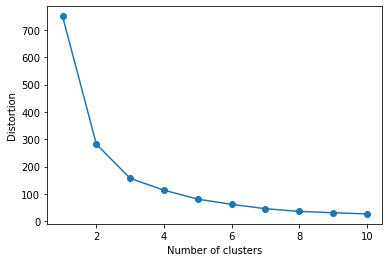

In [42]:
plot_distortion(df_scaled, max_clusters=10)

In [43]:
kmeans = KMeans(n_clusters=3, n_init=10)

y = kmeans.fit_predict(df_scaled)



In [47]:
df_scaled = pd.DataFrame(df_scaled, columns = ['starting_balance', 'ending_balance'])

In [48]:
df_scaled['Cluster'] = y

In [51]:
df_scaled.groupby('Cluster').count()

,starting_balance,ending_balance
Cluster,,
0,318,318
1,50,50
2,7,7


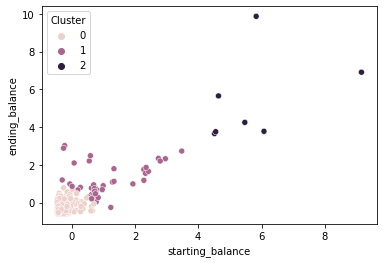

In [53]:
scatter_cluster = sns.scatterplot(data=df_scaled, x="starting_balance", y="ending_balance", hue="Cluster")

<AxesSubplot:xlabel='Cluster', ylabel='Count'>

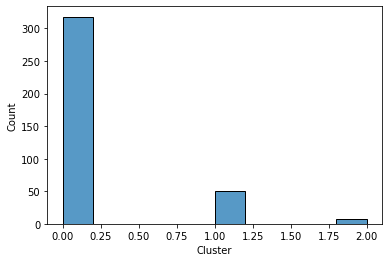

In [55]:
sns.histplot(df_scaled, x='Cluster')

In [57]:
max_value = df.ending_balance.max()

In [58]:
max_value

22432.78

In [59]:
min_value = df.ending_balance.min()
min_value

2.74